In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
import numpy as np

%matplotlib widget
from matplotlib import pyplot as plt
from stellarphot import PhotometryData

## Some M103 references:

+ Paper about several clusters, including M103: [https://www.aanda.org/articles/aa/pdf/2022/07/aa43151-22.pdf](https://www.aanda.org/articles/aa/pdf/2022/07/aa43151-22.pdf)
+ Paper with M103 memberships [https://www.aanda.org/articles/aa/pdf/2020/08/aa38192-20.pdf](https://www.aanda.org/articles/aa/pdf/2020/08/aa38192-20.pdf)
    + Vizier table for this paper: `J/A+A/640/A1/nodup`

### Read calibrated Feder photometry

In [2]:
phot_data = PhotometryData.read("photometry-better-transformed.ecsv")

### Tables can group your data

In [3]:
pd_group = phot_data.group_by("passband")

pd_d = {k[0]: v for k, v in zip(pd_group.groups.keys, pd_group.groups)}

In [4]:
pd_d

{'B': <PhotometryData length=2682>
 star_id         ra         ...      mag_cat            color_cat     
                deg         ...                                       
  int64       float64       ...      float64             float64      
 ------- ------------------ ... ------------------ -------------------
    1237 23.335564452653813 ... 10.807000160217285 0.21899986267089844
    1271 23.350240851186715 ...             11.625 0.25800037384033203
    1273 23.351301269714806 ...             11.625 0.25800037384033203
    1225  23.32589226251666 ...  12.48799991607666  0.3170003890991211
    1260 23.347662833039866 ... 10.807000160217285 0.21899986267089844
    1272 23.352792675715644 ...             11.625 0.25800037384033203
    1187 23.317336930418644 ... 11.713000297546387 0.26399993896484375
    1244  23.34069255475308 ... 10.807000160217285 0.21899986267089844
    1240  23.33006235269052 ... 11.357999801635742 0.24699974060058594
     ...                ... ...           

In [5]:
for p in ["V", "SR"]:
    print(all(pd_d["B"]["star_id"] == pd_d[p]["star_id"]))


True
True


### Another coordinates feature: get coordinates by name

In [6]:
m103c = SkyCoord.from_name("m103")
m103c

<SkyCoord (ICRS): (ra, dec) in deg
    (23.339, 60.659)>

Construct coordinate object for all stars to photometry for in the V band

In [7]:
pddc = pd_d["V"].coord = SkyCoord(pd_d["V"]["ra"], pd_d["V"]["dec"])
pddc

<SkyCoord (ICRS): (ra, dec) in deg
    [(23.33556445, 60.66280978), (23.35024085, 60.66077205),
     (23.35130127, 60.66245432), ..., (24.07585883, 60.89365568),
     (22.60916192, 60.41598706), (22.60658509, 60.41515744)]>

In [8]:
in_it_to_win_it = pddc.separation(m103c).arcmin < 5

In [9]:
Vizier.ROW_LIMIT = -1

In [10]:
result = Vizier.query_region(
    m103c,
    radius=30 * u.arcmin,
    catalog='J/A+A/640/A1/nodup',
    column_filters={"Cluster":"NGC_581"}
)

In [11]:
result

TableList with 1 tables:
	'0:J/A+A/640/A1/nodup' with 16 column(s) and 131 row(s) 

In [12]:
result[0]

RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA_,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
deg,deg,,mas,mas / yr,mas / yr,km / s,,mag,mag,,,K,,deg,deg
float64,float64,int64,float64,float64,float64,float64,int16,float64,float64,float64,str17,float64,str6,float64,float64
23.40324012061,60.53048324900,509837666289982848,0.33717187400526738,-1.40219847399188535,-0.487189794653699493,--,468,15.1485420,0.67165947,0.90000,NGC_581,10733.26000000,Simbad,23.40325239242,60.53048534662
23.28590680030,60.56619727142,509838735746907520,0.37052919500035358,-1.45685359134964498,-0.326973990585198993,--,470,16.0984900,1.0743885,0.80000,NGC_581,6634.19630000,Simbad,23.28591956453,60.56619867923
23.23606328211,60.60790918939,509839040679832576,0.30713948114943967,-1.36240562369875784,-0.439680610565864494,--,498,14.9543660,0.74058723,0.80000,NGC_581,6893.44430000,Simbad,23.23607523425,60.60791108246
23.20467012598,60.60277523862,509839079344255744,0.37702359370059085,-1.42353895757960958,-0.456434102610623837,--,516,14.8483740,0.6502352,1.00000,NGC_581,10408.44100000,Simbad,23.20468261244,60.60277720382
23.19889127550,60.59971104237,509839079344257792,0.38545947903500521,-1.33367990901161848,-0.56305489584835644,--,484,17.1770550,1.2599869,0.70000,NGC_581,6631.23340000,Simbad,23.19890297267,60.59971346664
23.15502808291,60.62956926951,509850899094234112,0.40408427234301708,-1.42717736595235456,-0.548459541473927059,--,505,13.0226980,0.4276352,1.00000,NGC_581,10843.86100000,Simbad,23.15504061169,60.62957163093
23.15760119831,60.62667101627,509850899094707584,0.4057955363161716,-1.42630582797869332,-0.597274075228277024,--,494,14.7947810,0.6396599,1.00000,NGC_581,11210.32700000,Simbad,23.15761371831,60.62667358787
23.17026738547,60.63278082642,509850933453969280,0.37935163127677751,-1.40738020569429745,-0.498519723925570202,--,488,14.0608800,0.6212454,0.90000,NGC_581,11424.43000000,Simbad,23.17027974169,60.63278297282


In [13]:
# Grab first result
da_goodies = result[0]

# Make coordinate object for all stars in cluster
da_goodies.coord = SkyCoord(da_goodies["RA_ICRS"], da_goodies["DE_ICRS"], unit=u.degree)

# Match every star in Vizier to the nearrest star in my data
in_cluster, d2d, _  = da_goodies.coord.match_to_catalog_sky(pddc)

In [14]:
_

<Quantity [1.04894025e-06, 1.14858966e-06, 1.03976333e-06, 1.26225042e-06,
           7.29601797e-05, 1.06105898e-06, 1.13264424e-06, 8.98815113e-07,
           9.24723622e-07, 1.37873627e-06, 7.81400251e-07, 6.62328147e-07,
           1.21051072e-06, 1.49300543e-04, 1.17340667e-06, 1.26585663e-06,
           8.39578431e-07, 7.59604938e-06, 6.76455456e-07, 1.16801396e-06,
           9.27008776e-07, 6.56257285e-05, 9.02833555e-07, 1.25797139e-06,
           1.26690947e-06, 1.99462843e-06, 1.13010365e-06, 1.24899545e-06,
           1.02374340e-06, 9.86726472e-07, 1.13664553e-06, 9.65450807e-07,
           1.14218661e-06, 1.66658782e-04, 1.06048346e-06, 8.71711323e-05,
           1.01966641e-06, 1.46498814e-04, 1.19359735e-06, 7.40319484e-05,
           8.75759611e-07, 9.14704580e-07, 8.23002944e-07, 8.32055097e-07,
           9.80782724e-07, 8.58899425e-07, 6.96157691e-07, 1.23608667e-06,
           5.90027323e-07, 1.15765444e-06, 1.04104292e-06, 1.30307511e-06,
           7.87890128e-07

In [15]:
in_cluster

array([494, 301, 205, 255, 255, 292, 289, 256, 555, 723, 623, 579, 714,
       656, 613, 503, 583, 305, 561, 406, 302, 443, 328, 259, 265, 263,
       211, 206, 161, 163, 164, 146, 140,  92,  60,  72,  61, 163,  92,
        55,  80, 113,  29,  37,  44,  41,  55, 134, 157, 174, 103, 114,
        73,  78,  83,  85, 108, 118, 142, 112,  89,  34,  53,  11,  21,
        36,  14,  10,  28,   6,  12,   3,   4,  16,  15,  27,  23,  16,
         7,   0,   0,  22,  33,  54,  50,  79,  87, 100,  48,  40, 101,
        45, 133,  93, 126, 139, 180,  66,  62,  74,  64, 110,  76,  65,
        84,  88,  77, 144, 195, 183, 257, 417, 402, 504, 219, 167, 127,
       227, 213, 322, 382, 130, 214, 133, 177, 204, 270, 343, 324, 407,
       462])

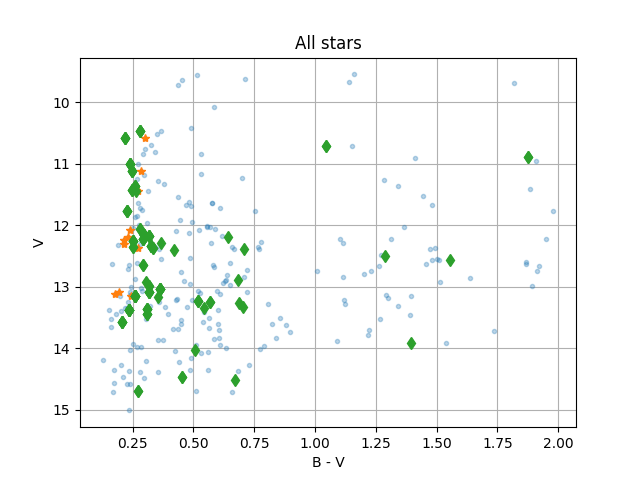

In [16]:
plt.figure()
plt.plot(pd_d["B"]["mag_inst_cal"] - pd_d["V"]["mag_inst_cal"], pd_d["V"]["mag_inst_cal"], ".", alpha=0.3, label="All stars, FeDer")
#plt.plot(pd_d["B"]["mag_inst_cal"][in_it_to_win_it] - pd_d["V"]["mag_inst_cal"][in_it_to_win_it], pd_d["V"]["mag_inst_cal"][in_it_to_win_it], "s")
plt.plot(pd_d["B"]["mag_inst_cal"][in_cluster] - pd_d["V"]["mag_inst_cal"][in_cluster], pd_d["V"]["mag_inst_cal"][in_cluster], "*", label="In cluster, Feder")
plt.plot(pd_d["B"]["mag_cat"][in_cluster] - pd_d["V"]["mag_cat"][in_cluster], pd_d["V"]["mag_cat"][in_cluster], "d", label="In cluster, APASS DR9")

plt.xlabel("B - V")
plt.ylabel("V")
plt.ylim(reversed(plt.ylim()))
plt.title("All stars")
plt.grid()

In [17]:
from astrowidgets import ImageWidget

In [18]:
iw = ImageWidget(image_width=1539, image_height=1539)
iw.load_fits("../../calibrated-nights/color-images-2024/M103-Carly/combined/combined_light_filter_V.fit")
iw

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

Mark all of the stars in the cluster according to Cantat-Gaudin et al (link near the top)

In [19]:
from astropy.table import Table

tab = Table({"coord": da_goodies.coord})

In [20]:
iw.add_markers(tab, use_skycoord=True)

Mark the red giant

In [21]:
the_rg = da_goodies["BP-RP"].argmax()
iw.marker = {'type': 'circle', 'color': 'red', 'radius': 30}
iw.add_markers(Table({"coord": [da_goodies.coord[the_rg]]}), use_skycoord=True)

In [22]:
da_goodies.coord[the_rg]

<SkyCoord (ICRS): (ra, dec) in deg
    (23.37171502, 60.64658381)>

Mark the stars that photometry was done on in the cluster

In [23]:
iw.marker = {'type': 'circle', 'color': 'yellow', 'radius': 30}
iw.add_markers(Table({"coord": pddc[in_cluster]}), use_skycoord=True)

In [24]:
len(da_goodies)

131

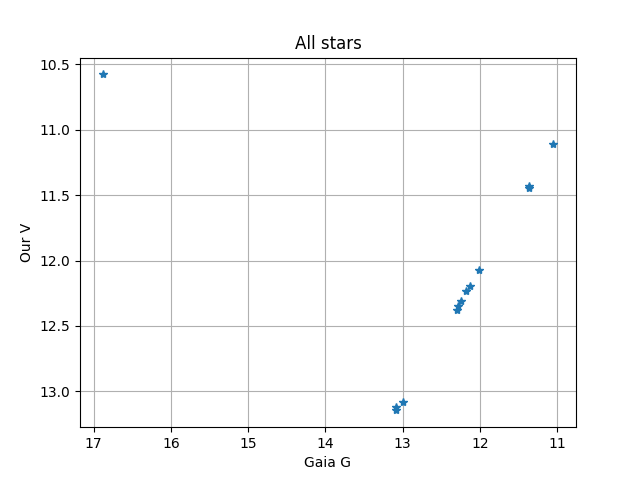

In [25]:
plt.figure()

plt.plot(da_goodies["Gmag"], pd_d["V"]["mag_inst_cal"][in_cluster], "*")

plt.xlabel("Gaia G")
plt.ylabel("Our V")
plt.ylim(reversed(plt.ylim()))
plt.xlim(reversed(plt.xlim()))
plt.title("All stars")
plt.grid()

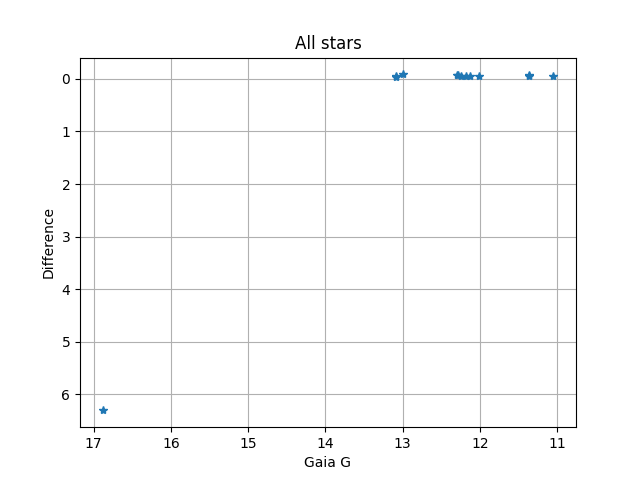

In [26]:
plt.figure()

plt.plot(da_goodies["Gmag"], da_goodies["Gmag"] - pd_d["V"]["mag_inst_cal"][in_cluster], "*")

plt.xlabel("Gaia G")
plt.ylabel("Difference")
plt.ylim(reversed(plt.ylim()))
plt.xlim(reversed(plt.xlim()))
plt.title("All stars")
plt.grid()

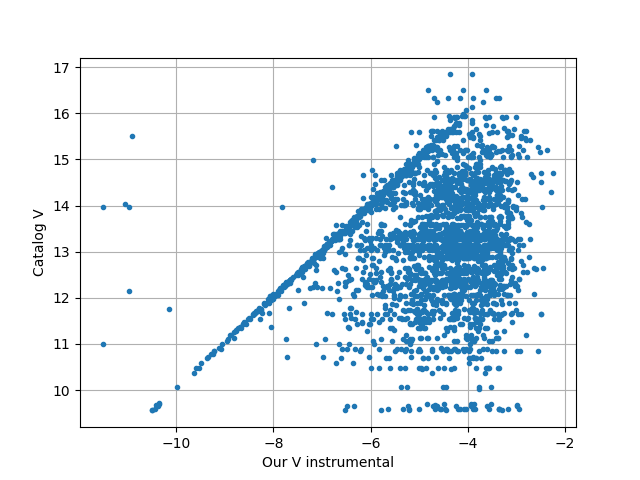

In [27]:
plt.figure()

plt.plot(pd_d["V"]["mag_inst"], pd_d["V"]["mag_cat"], ".")
plt.xlabel("Our V instrumental")
plt.ylabel("Catalog V")
plt.grid()

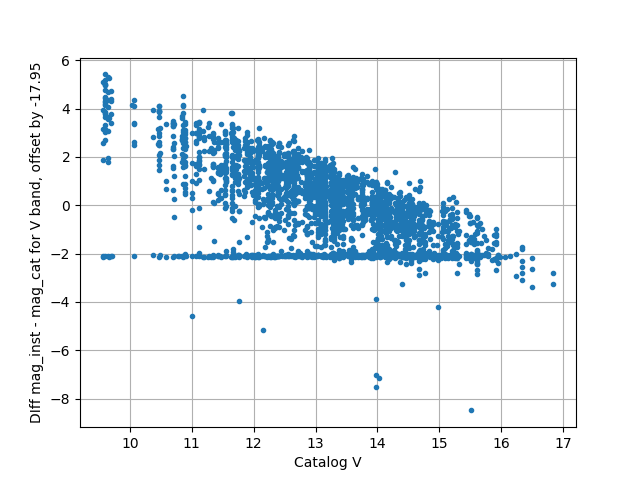

In [28]:
plt.figure()
pband = "V"
med_offset = np.nanmedian((pd_d[pband]["mag_inst"] - pd_d[pband]["mag_cat"]).filled(np.nan))


plt.plot(pd_d[pband]["mag_cat"], pd_d[pband]["mag_inst"] - pd_d[pband]["mag_cat"] - med_offset, ".")
plt.xlabel(f"Catalog {pband}")
plt.ylabel(f"DIff mag_inst - mag_cat for {pband} band, offset by {med_offset:.2f}")
plt.grid()

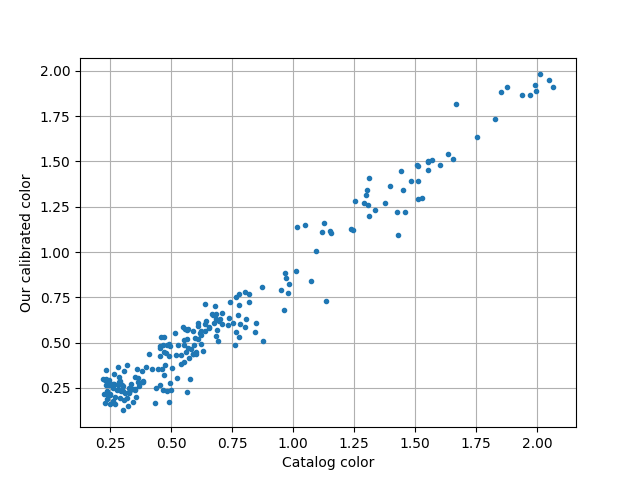

In [29]:
plt.figure()
pband = "V"
med_offset = np.nanmedian((pd_d[pband]["mag_inst"] - pd_d[pband]["mag_cat"]).filled(np.nan))

our_inst_color = pd_d["B"]["mag_inst"] - pd_d["V"]["mag_inst"]
our_cal_color = pd_d["B"]["mag_inst_cal"] - pd_d["V"]["mag_inst_cal"]
cat_color = pd_d["B"]["mag_cat"] - pd_d["V"]["mag_cat"]
plt.plot(cat_color, our_cal_color, ".")
plt.xlabel(f"Catalog color")
plt.ylabel(f"Our calibrated color")
plt.grid()

In [30]:
d2d.max()

<Angle 0.01005786 deg>

In [31]:
d2d.min()

<Angle 2.32247814e-05 deg>

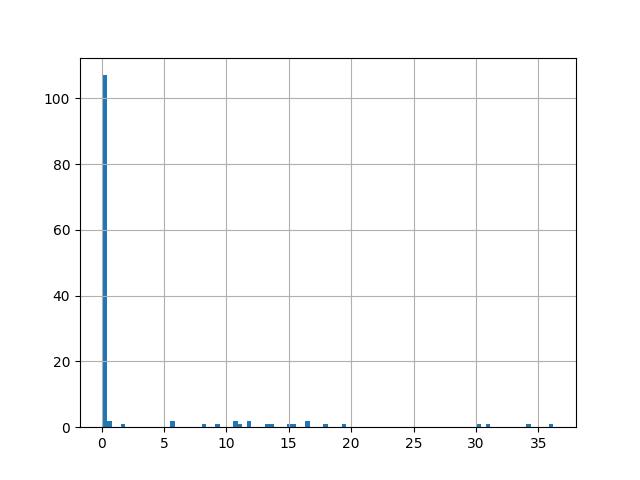

In [32]:
plt.figure()
plt.hist(d2d.arcsec, bins=100)
plt.grid()

In [33]:
close = d2d.arcsec < 2

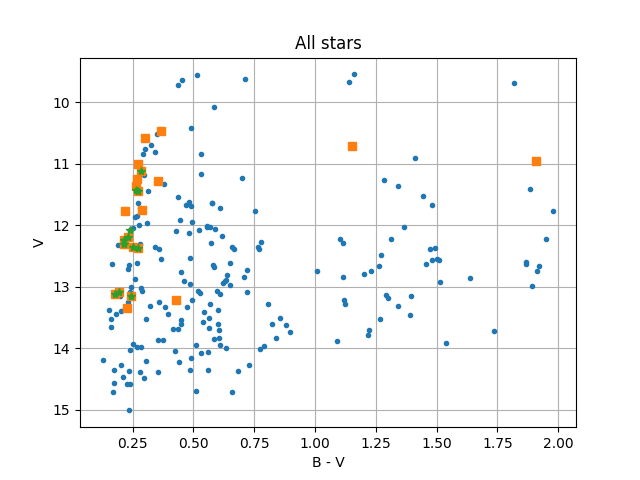

In [34]:

plt.figure()
plt.plot(pd_d["B"]["mag_inst_cal"] - pd_d["V"]["mag_inst_cal"], pd_d["V"]["mag_inst_cal"], ".")
plt.plot(pd_d["B"]["mag_inst_cal"][in_it_to_win_it] - pd_d["V"]["mag_inst_cal"][in_it_to_win_it], pd_d["V"]["mag_inst_cal"][in_it_to_win_it], "s")
plt.plot(pd_d["B"]["mag_inst_cal"][in_cluster[close]] - pd_d["V"]["mag_inst_cal"][in_cluster[close]], pd_d["V"]["mag_inst_cal"][in_cluster[close]], "*")

plt.xlabel("B - V")
plt.ylabel("V")
plt.ylim(reversed(plt.ylim()))
plt.title("All stars")
plt.grid()

In [35]:
da_goodies.colnames

['RA_ICRS',
 'DE_ICRS',
 'GaiaDR2',
 'Plx',
 'pmRA_',
 'pmDE',
 'RV',
 'o_Gmag',
 'Gmag',
 'BP-RP',
 'proba',
 'Cluster',
 'Teff50',
 'Simbad',
 '_RA.icrs',
 '_DE.icrs']

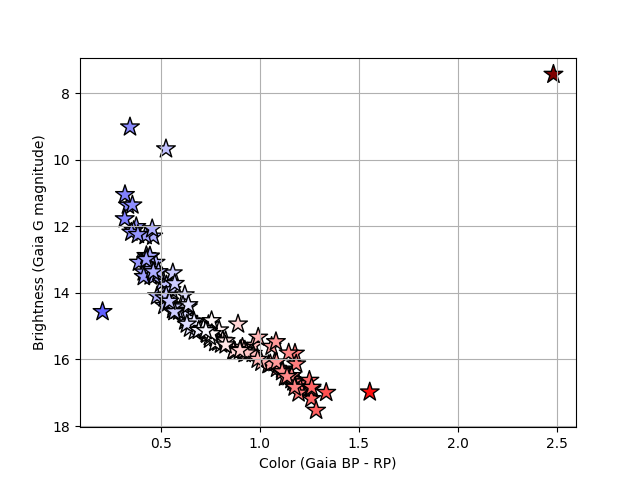

In [36]:
plt.figure()
c = da_goodies["BP-RP"]
plt.scatter(da_goodies["BP-RP"], da_goodies["Gmag"], marker="*", s=200, c=c, cmap="seismic", vmin=-1, edgecolors="black")
plt.xlabel("Color (Gaia BP - RP)")
plt.ylabel("Brightness (Gaia G magnitude)")
plt.ylim(reversed(plt.ylim()))
plt.grid()

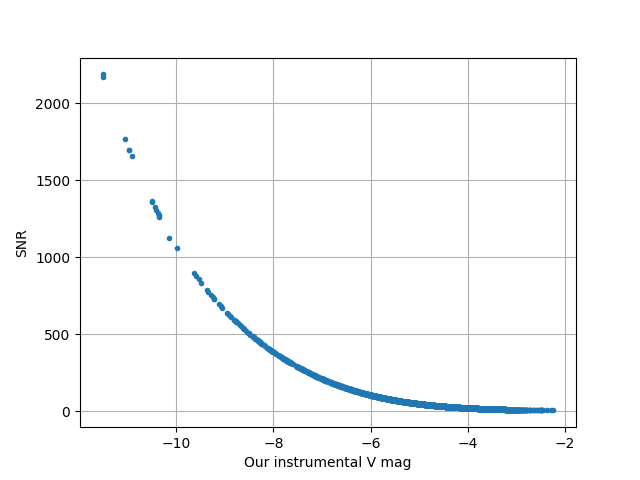

In [37]:
plt.figure()
plt.plot(pd_d["V"]["mag_inst"], pd_d["V"]["snr"], ".")
plt.xlabel("Our instrumental V mag")
plt.ylabel("SNR")
plt.grid()

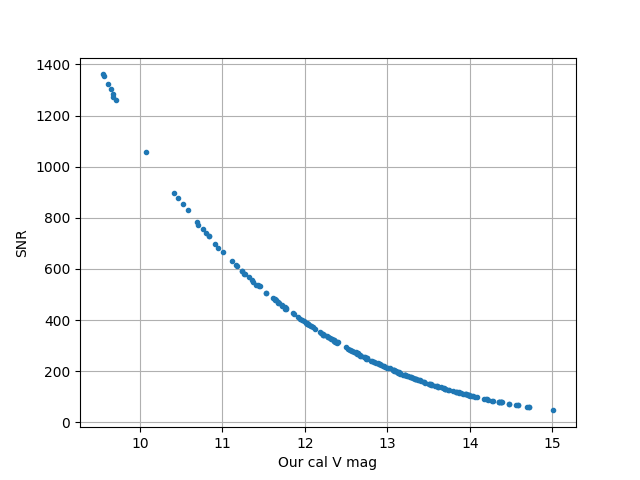

In [38]:
plt.figure()
plt.plot(pd_d["V"]["mag_inst_cal"], pd_d["V"]["snr"], ".")
plt.xlabel("Our cal V mag")
plt.ylabel("SNR")
plt.grid()

In [39]:
pd_d["V"]["force_cal"] = (1 + pd_d["V"]["a"]) * pd_d["V"]["mag_inst"] + pd_d["V"]["z"]
pd_d["B"]["force_cal"] = (1 + pd_d["B"]["a"]) * pd_d["B"]["mag_inst"] + pd_d["B"]["z"]


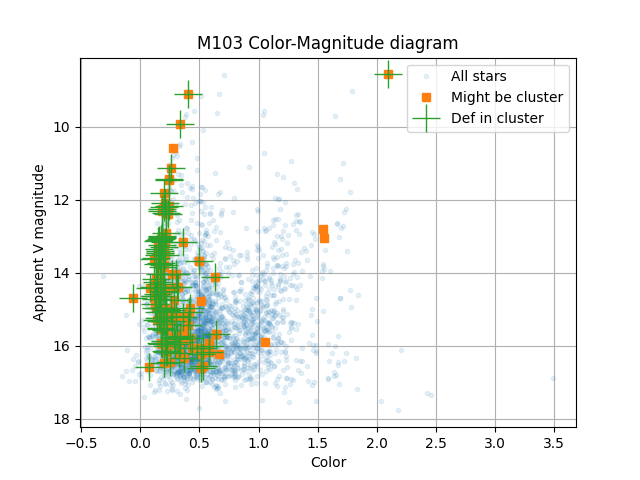

In [40]:
plt.figure()
reddening =  +0.587
plt.plot(pd_d["B"]["force_cal"] - pd_d["V"]["force_cal"], pd_d["V"]["force_cal"], ".", alpha=0.1, label="All stars")
plt.plot(pd_d["B"]["force_cal"][in_cluster] - pd_d["V"]["force_cal"][in_cluster], pd_d["V"]["force_cal"][in_cluster], "s", label="Might be cluster")
plt.plot(pd_d["B"]["force_cal"][in_cluster[close]] - pd_d["V"]["force_cal"][in_cluster[close]], pd_d["V"]["force_cal"][in_cluster[close]], "+", markersize=20, label="Def in cluster")
plt.ylim(reversed(plt.ylim()))
plt.title("M103 Color-Magnitude diagram")
plt.xlabel("Color")
plt.ylabel("Apparent V magnitude")
plt.legend()
plt.grid()

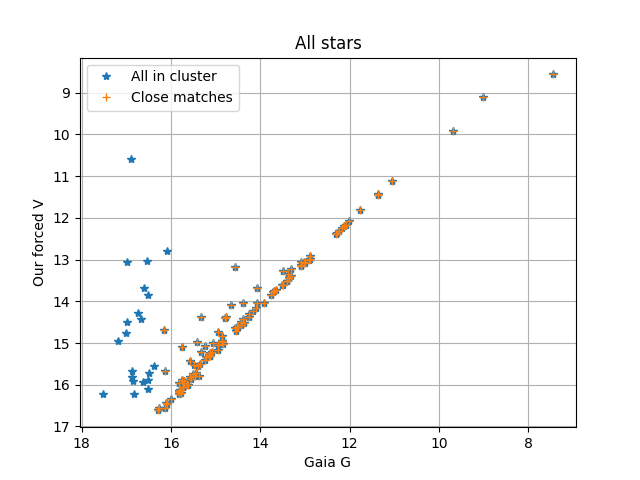

In [41]:
plt.figure()

plt.plot(da_goodies["Gmag"], pd_d["V"]["force_cal"][in_cluster], "*", label="All in cluster")
plt.plot(da_goodies["Gmag"][close], pd_d["V"]["force_cal"][in_cluster[close]], "+", label="Close matches")

plt.xlabel("Gaia G")
plt.ylabel("Our forced V")
plt.ylim(reversed(plt.ylim()))
plt.xlim(reversed(plt.xlim()))
plt.title("All stars")
plt.legend()
plt.grid()

In [43]:
np.nanmax(pd_d["V"]["mag_inst_cal"])

15.011853439521987